In [24]:
##Librerias

import matplotlib.pyplot as plt  # gráficos
import pandas as pd ### para manejo de datos
import a_funciones as funciones  ###archivo de funciones propias
import numpy as np #procesamiento eficiente de grandes conjuntos de datos y la realización de operaciones matemáticas
import io
import requests

In [25]:
### Lectura de datos

df = pd.read_csv("https://raw.githubusercontent.com/andressj1/A-RH/main/Bases/basefinal.csv", sep=",")

## **Eliminar variables mencionadas por correlación**

In [26]:
#Eliminación de variables

df.drop(["YearsWithCurrManager"], axis=1, inplace=True)
df.drop(["TotalWorkingYears"], axis=1, inplace=True)
df.drop(["YearsSinceLastPromotion"], axis=1, inplace=True)



## **Tratamiento de atípicos**

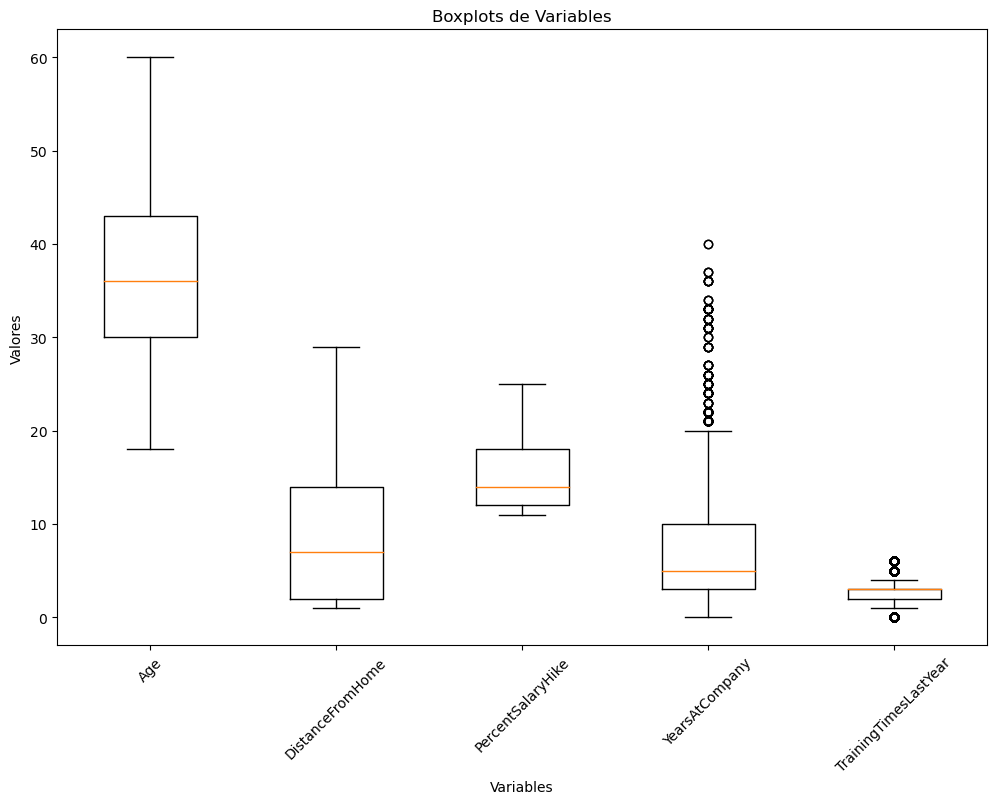

In [27]:
#Caja de bigotes de las variables numericas, menos salario 

variables = ['Age', 'DistanceFromHome', 'PercentSalaryHike', 
             'YearsAtCompany', 'TrainingTimesLastYear']

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 8))

# Crear los boxplots
ax.boxplot(df[variables].values, labels=variables)

# Configurar el título y las etiquetas
ax.set_title('Boxplots de Variables')
ax.set_xlabel('Variables')
ax.set_ylabel('Valores')

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)

# Mostrar la imagen
plt.show()

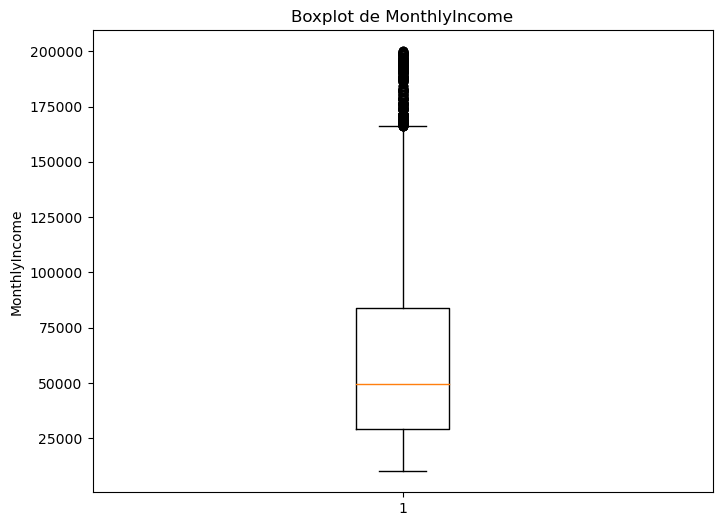

In [28]:
#Caja de bigotes del salario

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(8, 6))

# Crear el boxplot de MonthlyIncome
ax.boxplot(df['MonthlyIncome'])
ax.set_title('Boxplot de MonthlyIncome')
ax.set_ylabel('MonthlyIncome')

# Mostrar la figura
plt.show()

In [29]:
""" Se trataran los atipicos de yearsatcompany, ya que es la segunda variable numerica que mas presenta atipicos, 
y cuenta con un numero de categorias trabajable ... No se trata los atipicos de MonthlyIncome, porque, tiene 
muchisimas categorias y al hacer una impuacion de valores extremos me quita una cantidad considerable de datos.
Tampoco se tratara los atipicos de TrainingTimesLastYear porque solo tiene dos; una cantidad muy poca a comparación
del total
 """

### Contabilizar los datos por categoria

df['YearsAtCompany'].value_counts()

5     583
1     492
3     379
2     377
10    357
4     324
7     268
9     246
8     238
6     224
0     125
11     96
20     81
13     72
15     59
14     54
22     45
12     42
21     42
18     39
16     35
19     33
17     26
24     18
33     14
26     12
25     12
31      9
32      8
29      6
27      6
36      6
23      6
34      3
30      3
37      3
40      2
Name: YearsAtCompany, dtype: int64

In [30]:
""" Las categorias 40, 37, 36, 34, 33, 32 en total me suman 36 datos, que a comparacion del total
son muy pocos; lo que su eliminación no afectaria el modelo... "sera una imputacion solo a valores extremos" """

### Imputación de datos 

df = df[df['YearsAtCompany'] < 32.0]

## **Transformación de variables**

In [31]:
### Visualizar tipo de variable

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4309 entries, 0 to 4344
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EnvironmentSatisfaction  4309 non-null   float64
 1   JobSatisfaction          4309 non-null   float64
 2   WorkLifeBalance          4309 non-null   float64
 3   Age                      4309 non-null   int64  
 4   BusinessTravel           4309 non-null   object 
 5   Department               4309 non-null   object 
 6   DistanceFromHome         4309 non-null   int64  
 7   Education                4309 non-null   int64  
 8   EducationField           4309 non-null   object 
 9   Gender                   4309 non-null   object 
 10  JobLevel                 4309 non-null   int64  
 11  JobRole                  4309 non-null   object 
 12  MaritalStatus            4309 non-null   object 
 13  MonthlyIncome            4309 non-null   int64  
 14  NumCompaniesWorked      

In [32]:
# Convertir las variables float a tipo entero

df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].astype(int)
df['JobSatisfaction'] = df['JobSatisfaction'].astype(int)
df['WorkLifeBalance'] = df['WorkLifeBalance'].astype(int) 
df['NumCompaniesWorked'] = df['NumCompaniesWorked'].astype(int)

""" Se deja todo en el mismo formato(int) para mas adelante convertirlas en dummies, y no salga error """

' Se deja todo en el mismo formato(int) para mas adelante convertirlas en dummies, y no salga error '

In [33]:
### Convertimos VO a binaria
 
df['Attrition'] = df['Attrition'].map({'No': 0, 'Yes': 1}).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4309 entries, 0 to 4344
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EnvironmentSatisfaction  4309 non-null   int32 
 1   JobSatisfaction          4309 non-null   int32 
 2   WorkLifeBalance          4309 non-null   int32 
 3   Age                      4309 non-null   int64 
 4   BusinessTravel           4309 non-null   object
 5   Department               4309 non-null   object
 6   DistanceFromHome         4309 non-null   int64 
 7   Education                4309 non-null   int64 
 8   EducationField           4309 non-null   object
 9   Gender                   4309 non-null   object
 10  JobLevel                 4309 non-null   int64 
 11  JobRole                  4309 non-null   object
 12  MaritalStatus            4309 non-null   object
 13  MonthlyIncome            4309 non-null   int64 
 14  NumCompaniesWorked       4309 non-null  

In [34]:
### Exportar base 

df.to_csv(r'C:\Users\luisa\OneDrive\Desktop\Analitica lll RH\Bases\df_fin.csv', index=False)